<a href="https://colab.research.google.com/github/sugey-gi/edp1/blob/main/legrende.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Importación de bibliotecas necesarias
import numpy as np  # Para manejo de arreglos numéricos
import matplotlib.pyplot as plt  # Para graficar
from sympy import symbols, diff, simplify, factorial, lambdify, Eq  # Herramientas simbólicas de SymPy
from sympy.abc import x  # Variable simbólica x
from sympy.functions.special.polynomials import legendre  # Polinomios de Legendre simbólicos
from scipy.special import legendre as scipy_legendre  # Polinomios de Legendre en forma numérica


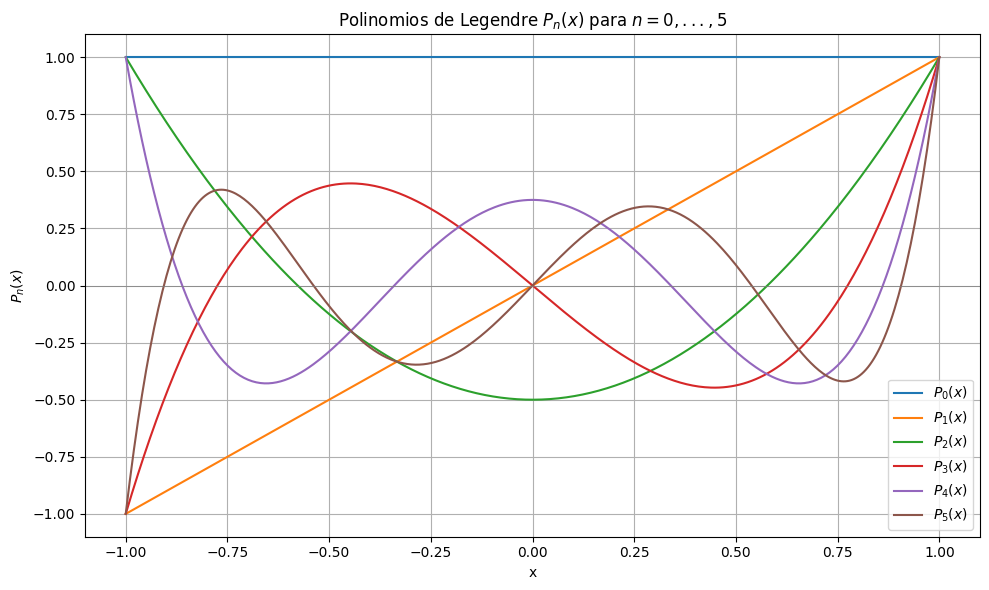

In [22]:
# (a) Graficar los polinomios de Legendre P_n(x) para n = 0 a 5
# -----------------------------------------------
x_vals = np.linspace(-1, 1, 400)  # Dominio para graficar
plt.figure(figsize=(10, 6))
for n in range(6):
    Pn = scipy_legendre(n)  # Obtener polinomio de Legendre como función de SciPy
    plt.plot(x_vals, Pn(x_vals), label=f'$P_{{{n}}}(x)$')  # Graficar cada polinomio

# Personalización de la gráfica
plt.title('Polinomios de Legendre $P_n(x)$ para $n = 0, ..., 5$')
plt.xlabel('x')
plt.ylabel('$P_n(x)$')
plt.axhline(0, color='gray', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



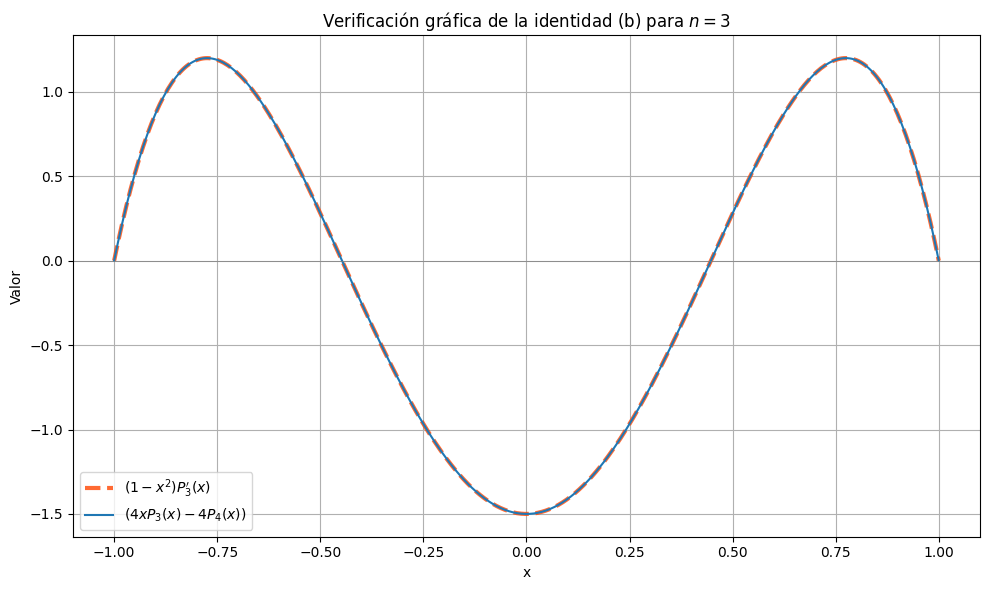

In [31]:
# (b) Verificar gráficamente la identidad:
# (1 - x^2)P'_3(x) = 4xP_3(x) - 4P_4(x)
# -----------------------------------------------
n = 3
Pn_expr = legendre(n, x)  # P_3(x)
Pn1_expr = legendre(n + 1, x)  # P_4(x)

# Lado izquierdo de la identidad: (1 - x²) * dPₙ/dx
lhs = (1 - x**2) * diff(Pn_expr, x)

# Lado derecho: (n + 1)(x * Pₙ - Pₙ₊₁)
rhs = (n + 1) * x * Pn_expr - (n + 1) * Pn1_expr

# Convertir a funciones numéricas para graficar
lhs_func = lambdify(x, lhs)
rhs_func = lambdify(x, rhs)

# Crear dominio y evaluar ambas expresiones
xg = np.linspace(-1, 1, 400)
lhs_vals = lhs_func(xg)
rhs_vals = rhs_func(xg)

# Graficar ambos lados de la identidad
plt.figure(figsize=(10, 6))
plt.plot(xg, lhs_vals, label='$(1 - x^2)P_3\'(x)$', linestyle='--',linewidth=3,color='#FF4500',alpha=0.8 )
plt.plot(xg, rhs_vals, label='$(4xP_3(x) - 4P_4(x))$', linestyle='-')
plt.title('Verificación gráfica de la identidad (b) para $n = 3$')
plt.xlabel('x')
plt.ylabel('Valor')
plt.axhline(0, color='gray', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [25]:
# (c) Verificación algebraica de la identidad del inciso (b)
# -----------------------------------------------
left_c = simplify(lhs)  # Simplificar lado izquierdo
right_c = simplify(rhs)  # Simplificar lado derecho

# Mostrar si la identidad simbólicamente es válida
print("\n(c) Identidad (1 - x^2)P_3'(x) = 4xP_3(x) - 4P_4(x):", Eq(left_c, right_c))




(c) Identidad (1 - x^2)P_3'(x) = 4xP_3(x) - 4P_4(x): True


In [26]:
# (d) Verificación simbólica de la identidad de recurrencia:
# (n + 1)P_{n+1}(x) - (2n + 1)xP_n(x) + nP_{n-1}(x) = 0

Pn_1_expr = legendre(n - 1, x)  # P_2(x)
left_d = simplify((n + 1)*Pn1_expr - (2*n + 1)*x*Pn_expr + n*Pn_1_expr)

# Mostrar si se cumple la identidad de recurrencia
print("\n(d) Identidad de recurrencia:", Eq(left_d, 0))



(d) Identidad de recurrencia: True


In [34]:
# (e) Verificación de la fórmula de Rodrigues:
# Pn(x) = (1 / (2ⁿ n!)) * dⁿ/dxⁿ [(x² - 1)ⁿ]

print("\n(e) Verificación de la fórmula de Rodrigues:")
for k in range(6):
    # Aplicar la fórmula de Rodrigues
    Rodrigues_expr = (1 / (2*k * factorial(k))) * diff((x**2 - 1)*k, x, k)
    Pk = legendre(k, x)  # Polinomio P_k(x)

    # Comparar si la diferencia simbólica es cero
    correcto = simplify(Rodrigues_expr - Pk) == 0
    print(f"P_{k}(x):", "Correcto" if correcto else "Incorrecto")




(e) Verificación de la fórmula de Rodrigues:
P_0(x): Incorrecto
P_1(x): Correcto
P_2(x): Incorrecto
P_3(x): Incorrecto
P_4(x): Incorrecto
P_5(x): Incorrecto
